# **Experiment-1**
### **Baseline with layer hieght = 0.3mm**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('/content/baseline_l3.csv')
df.head()

,Timestamp,Voltage (V),Current (A),Power (W),Delta Time (s),Cumulative Energy (Wh)
0,2025-11-30 12:32:27,24.04,0.06,1.4,0.097,0.000038
1,2025-11-30 12:32:29,24.03,0.06,1.4,2.123,0.000863
2,2025-11-30 12:32:31,24.03,0.06,1.4,2.123,0.001689
3,2025-11-30 12:32:33,24.03,0.06,1.4,2.124,0.002515
4,2025-11-30 12:32:36,24.03,0.06,1.4,2.122,0.003340


In [44]:
df.describe()

,Voltage (V),Current (A),Power (W),Delta Time (s),Cumulative Energy (Wh)
count,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000
mean,23.959143,3.324200,79.478770,2.134558,74.655329
std,0.498322,3.244105,77.312123,0.326389,40.942604
min,5.300000,0.030000,0.100000,0.097000,0.000038
25%,23.990000,1.770000,42.400000,2.119000,39.298607
50%,24.000000,2.190000,52.500000,2.122000,75.694674
75%,24.000000,2.310000,55.400000,2.128000,111.755115
max,24.040000,10.980000,262.600000,12.285000,143.385613


In [45]:
df = df.drop(columns=['Timestamp', 'Cumulative Energy (Wh)'])

In [46]:
df = df[df['Power (W)'] > 20]
df = df[df['Delta Time (s)'] < 5]

In [47]:
df['Energy_step_Wh'] = df['Power (W)'] * df['Delta Time (s)'] / 3600
df['Cumulative_Energy_Wh'] = df['Energy_step_Wh'].cumsum()
df['Cumulative_time_s'] = df['Delta Time (s)'].cumsum()
df.head()

,Voltage (V),Current (A),Power (W),Delta Time (s),Energy_step_Wh,Cumulative_Energy_Wh,Cumulative_time_s
6,24.01,1.65,39.6,2.131,0.023441,0.023441,2.131
7,24.01,1.65,39.6,2.122,0.023342,0.046783,4.253
8,24.01,1.65,39.6,2.121,0.023331,0.070114,6.374
9,24.01,1.65,39.6,2.164,0.023804,0.093918,8.538
10,24.01,1.65,39.6,2.118,0.023298,0.117216,10.656


In [48]:
#save modified dataframe as csv file
df.to_csv('baseline_l3_modified.csv', index=False)

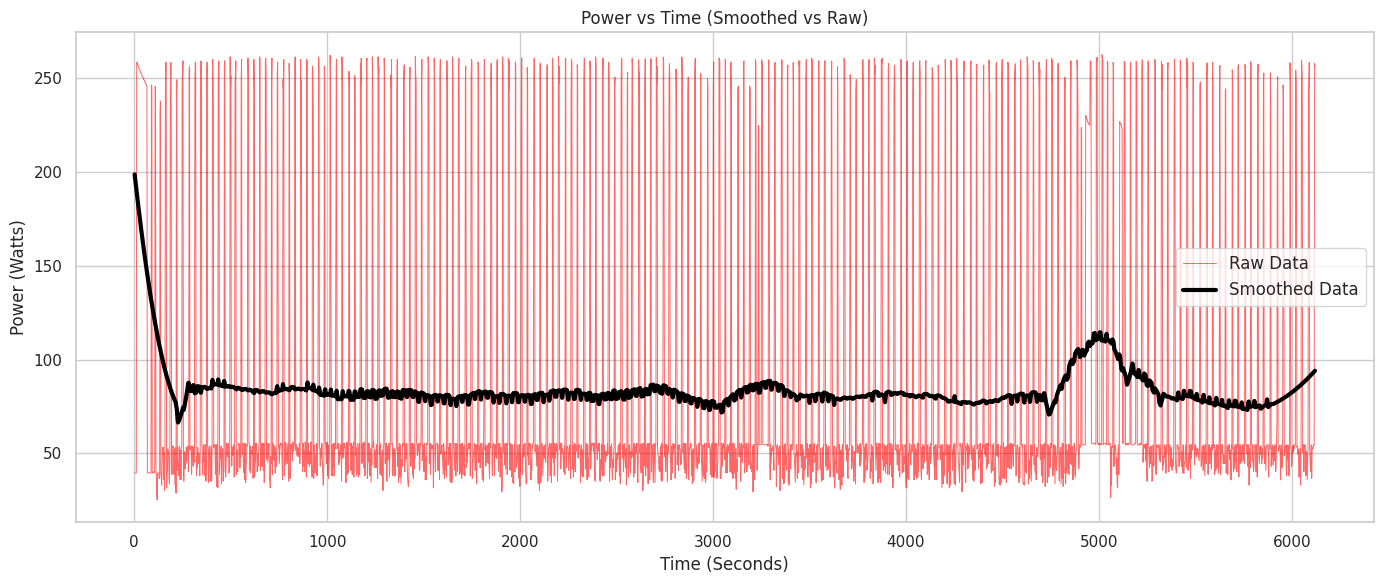

In [49]:
from scipy.signal import savgol_filter

# ---- SETTINGS ----
window_length = 201   # must be odd and <= dataset size
poly_order = 2        # polynomial fitting order

# Apply Savitzky–Golay smoothing
df['power_smooth'] = savgol_filter(df['Power (W)'], window_length, poly_order)

# ---- PLOT ----
plt.figure(figsize=(14,6))
sns.set(style="whitegrid")

# Raw Data (thin line, transparent)
sns.lineplot(x='Cumulative_time_s', y='Power (W)', data=df, linewidth=0.7, color='red', alpha=0.6, label='Raw Data')

# Smoothed Data (thick bold line)
sns.lineplot(x='Cumulative_time_s', y='power_smooth', data=df, linewidth=3, color='black', label='Smoothed Data')

# Labels and formatting
plt.xlabel("Time (Seconds)")
plt.ylabel("Power (Watts)")
plt.title("Power vs Time (Smoothed vs Raw)")

# Improve readability
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


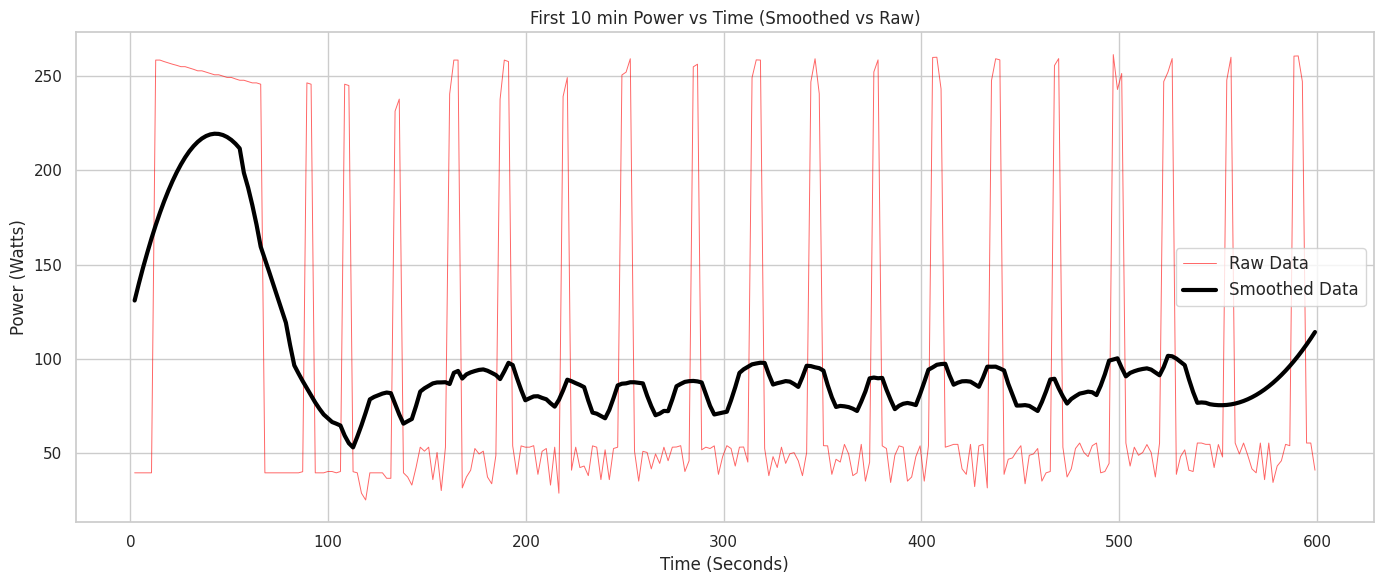

In [50]:
data_subset = df[df['Cumulative_time_s'] <= 600].copy()
data_subset['power_smooth'] = savgol_filter(data_subset['Power (W)'], 51, 2)

# plotting code uses df_subset instead of df
plt.figure(figsize=(14,6))
sns.set(style="whitegrid")

# Raw Data (thin line, transparent)
sns.lineplot(x='Cumulative_time_s', y='Power (W)', data=data_subset, linewidth=0.7, color='red', alpha=0.6, label='Raw Data')

# Smoothed Data (thick bold line)
sns.lineplot(x='Cumulative_time_s', y='power_smooth', data=data_subset, linewidth=3, color='black', label='Smoothed Data')

# Labels and formatting
plt.xlabel("Time (Seconds)")
plt.ylabel("Power (Watts)")
plt.title("First 10 min Power vs Time (Smoothed vs Raw)")

# Improve readability
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [51]:
print(f'time : {df['Cumulative_time_s'].max()//60}')
print(f'mean power : {df['Power (W)'].mean()}')
print(f'Total Energy : {df['Cumulative_Energy_Wh'].max()*3.6}')

time : 102.0
mean power : 83.86127689104788
Total Energy : 513.2792966000018


### **Baseline with layer hieght = 0.2mm**

In [52]:
df = pd.read_csv('/content/baseline_l2.csv')
df.head()

,Timestamp,Voltage (V),Current (A),Power (W),Delta Time (s),Cumulative Energy (Wh)
0,30-11-2025 14:41,24.04,0.06,1.4,0.094,0.000037
1,30-11-2025 14:41,24.04,0.09,2.1,2.129,0.001278
2,30-11-2025 14:41,24.04,0.06,1.4,2.121,0.002103
3,30-11-2025 14:41,24.04,0.06,1.4,2.120,0.002927
4,30-11-2025 14:41,24.04,0.06,1.4,2.128,0.003755


In [53]:
df.describe()

,Voltage (V),Current (A),Power (W),Delta Time (s),Cumulative Energy (Wh)
count,3546.000000,3546.00000,3546.000000,3546.000000,3546.000000
mean,23.928116,3.30747,78.785843,2.176912,90.772322
std,0.124412,3.16612,74.891892,1.923326,51.642487
min,23.460000,0.06000,1.400000,0.094000,0.000037
25%,23.930000,1.74000,41.600000,2.119000,43.834521
50%,23.970000,2.16000,51.800000,2.121000,94.726479
75%,24.000000,2.28000,54.600000,2.129000,135.963003
max,24.040000,10.98000,262.000000,95.789000,174.352820


In [54]:
df = df.drop(columns=['Timestamp', 'Cumulative Energy (Wh)'])

In [55]:
df = df[df['Power (W)'] > 20]
df = df[df['Delta Time (s)'] < 5]

In [56]:
df['Energy_step_Wh'] = df['Power (W)'] * df['Delta Time (s)'] / 3600
df['Cumulative_Energy_Wh'] = df['Energy_step_Wh'].cumsum()
df['Cumulative_time_s'] = df['Delta Time (s)'].cumsum()
df.head()

,Voltage (V),Current (A),Power (W),Delta Time (s),Energy_step_Wh,Cumulative_Energy_Wh,Cumulative_time_s
12,24.01,1.68,40.3,2.132,0.023867,0.023867,2.132
13,24.01,1.65,39.6,2.121,0.023331,0.047198,4.253
14,24.01,1.65,39.6,2.120,0.023320,0.070518,6.373
15,24.01,1.65,39.6,2.128,0.023408,0.093926,8.501
16,24.01,1.65,39.6,2.115,0.023265,0.117191,10.616


In [57]:
#save modified dataframe as csv file
df.to_csv('baseline_l2_modified.csv', index=False)

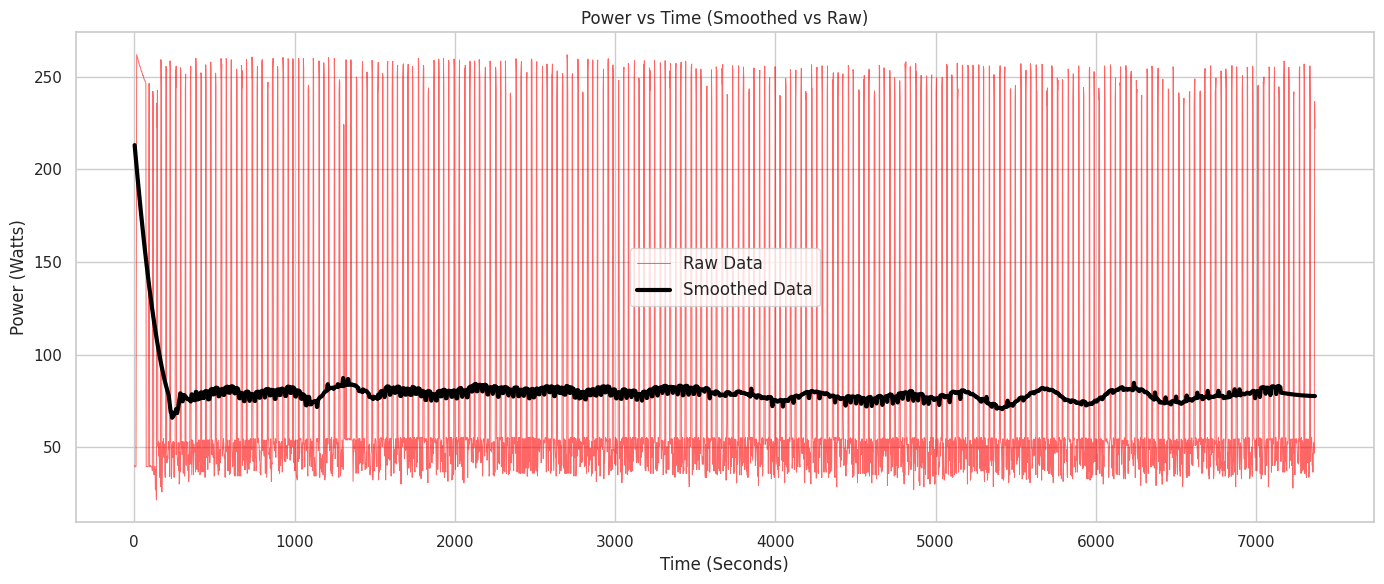

In [58]:
from scipy.signal import savgol_filter

# ---- SETTINGS ----
window_length = 201   # must be odd and <= dataset size
poly_order = 2        # polynomial fitting order

# Apply Savitzky–Golay smoothing
df['power_smooth'] = savgol_filter(df['Power (W)'], window_length, poly_order)

# ---- PLOT ----
plt.figure(figsize=(14,6))
sns.set(style="whitegrid")

# Raw Data (thin line, transparent)
sns.lineplot(x='Cumulative_time_s', y='Power (W)', data=df, linewidth=0.7, color='red', alpha=0.6, label='Raw Data')

# Smoothed Data (thick bold line)
sns.lineplot(x='Cumulative_time_s', y='power_smooth', data=df, linewidth=3, color='black', label='Smoothed Data')

# Labels and formatting
plt.xlabel("Time (Seconds)")
plt.ylabel("Power (Watts)")
plt.title("Power vs Time (Smoothed vs Raw)")

# Improve readability
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


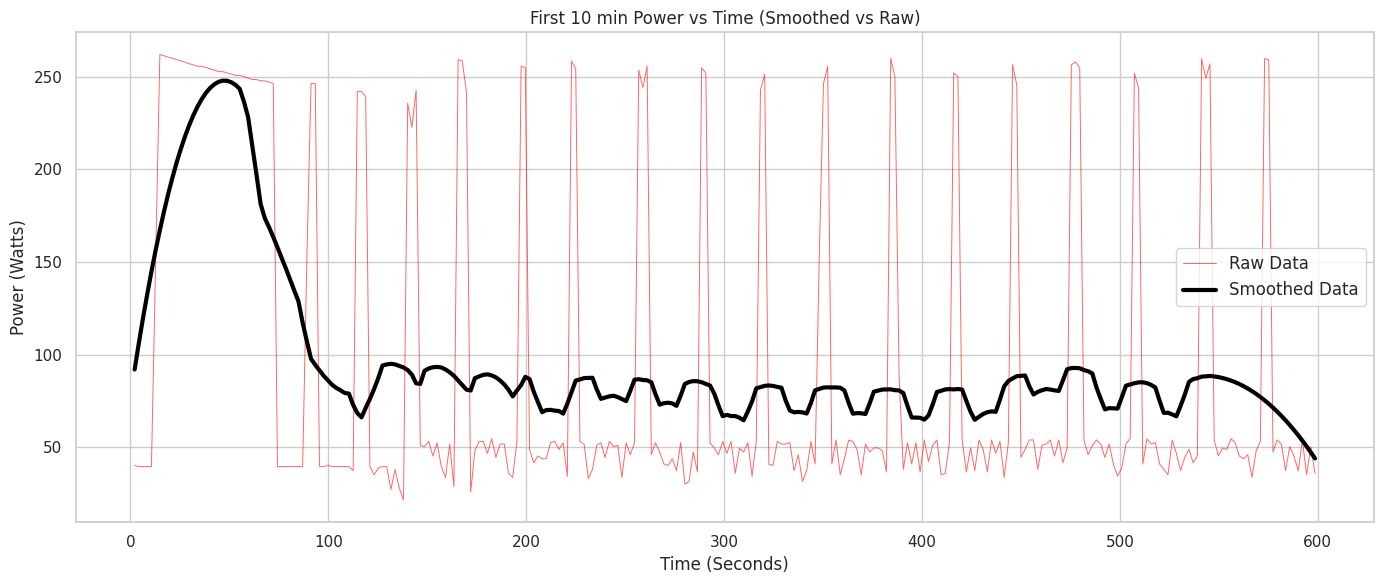

In [59]:
data_subset = df[df['Cumulative_time_s'] <= 600].copy()
data_subset['power_smooth'] = savgol_filter(data_subset['Power (W)'], 51, 2)

# plotting code uses df_subset instead of df
plt.figure(figsize=(14,6))
sns.set(style="whitegrid")

# Raw Data (thin line, transparent)
sns.lineplot(x='Cumulative_time_s', y='Power (W)', data=data_subset, linewidth=0.7, color='red', alpha=0.6, label='Raw Data')

# Smoothed Data (thick bold line)
sns.lineplot(x='Cumulative_time_s', y='power_smooth', data=data_subset, linewidth=3, color='black', label='Smoothed Data')

# Labels and formatting
plt.xlabel("Time (Seconds)")
plt.ylabel("Power (Watts)")
plt.title("First 10 min Power vs Time (Smoothed vs Raw)")

# Improve readability
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [60]:
print(f'time : {df['Cumulative_time_s'].max()//60}')
print(f'mean power : {df['Power (W)'].mean()}')
print(f'Total Energy : {df['Cumulative_Energy_Wh'].max()*3.6}')

time : 122.0
mean power : 80.27938887287404
Total Energy : 591.4610492999999


### **Baseline with layer hieght = 0.1mm**

In [61]:
df = pd.read_csv('/content/baseline_l1.csv')
df.head()

,Timestamp,Voltage (V),Current (A),Power (W),Delta Time (s),Cumulative Energy (Wh)
0,2025-11-30 17:05:11,24.00,1.65,39.6,0.094,0.001036
1,2025-11-30 17:05:13,23.85,1.65,39.3,2.125,0.024234
2,2025-11-30 17:05:15,23.69,10.47,248.0,2.118,0.170145
3,2025-11-30 17:05:17,23.68,10.47,247.9,2.129,0.316753
4,2025-11-30 17:05:20,23.67,10.41,246.4,2.121,0.461930


In [62]:
df.describe()

,Voltage (V),Current (A),Power (W),Delta Time (s),Cumulative Energy (Wh)
count,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000
mean,23.950253,3.282974,78.366625,2.129858,149.252453
std,0.271021,3.111374,73.861151,0.278440,86.047255
min,5.900000,0.030000,0.100000,0.094000,0.001036
25%,23.960000,1.800000,43.100000,2.119000,74.420870
50%,23.990000,2.160000,51.800000,2.121000,148.571165
75%,24.000000,2.280000,54.600000,2.129000,223.731242
max,24.050000,10.950000,262.000000,17.355000,297.858809


In [63]:
df = df.drop(columns=['Timestamp', 'Cumulative Energy (Wh)'])

In [64]:
df = df[df['Power (W)'] > 20]
df = df[df['Delta Time (s)'] < 5]

In [65]:
df['Energy_step_Wh'] = df['Power (W)'] * df['Delta Time (s)'] / 3600
df['Cumulative_Energy_Wh'] = df['Energy_step_Wh'].cumsum()
df['Cumulative_time_s'] = df['Delta Time (s)'].cumsum()
df.head()

,Voltage (V),Current (A),Power (W),Delta Time (s),Energy_step_Wh,Cumulative_Energy_Wh,Cumulative_time_s
0,24.00,1.65,39.6,0.094,0.001034,0.001034,0.094
1,23.85,1.65,39.3,2.125,0.023198,0.024232,2.219
2,23.69,10.47,248.0,2.118,0.145907,0.170139,4.337
3,23.68,10.47,247.9,2.129,0.146605,0.316744,6.466
4,23.67,10.41,246.4,2.121,0.145171,0.461915,8.587


In [70]:
#save modified dataframe as csv file
df.to_csv('baseline_l1_modified.csv', index=False)

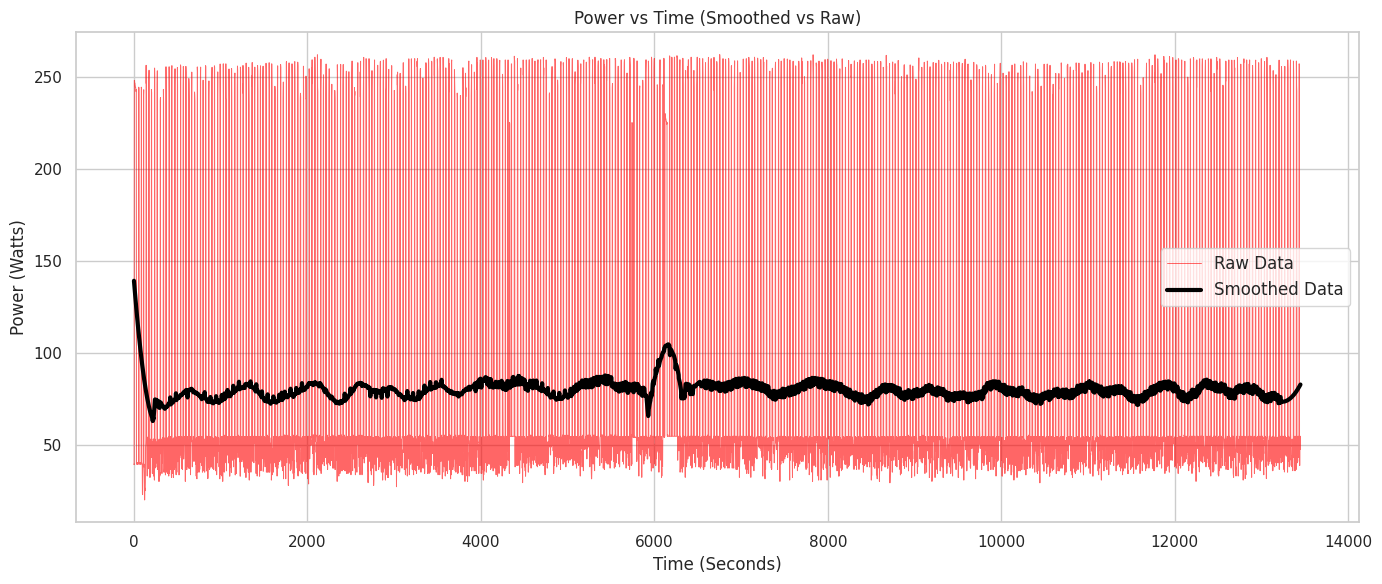

In [67]:
from scipy.signal import savgol_filter

# ---- SETTINGS ----
window_length = 201   # must be odd and <= dataset size
poly_order = 2        # polynomial fitting order

# Apply Savitzky–Golay smoothing
df['power_smooth'] = savgol_filter(df['Power (W)'], window_length, poly_order)

# ---- PLOT ----
plt.figure(figsize=(14,6))
sns.set(style="whitegrid")

# Raw Data (thin line, transparent)
sns.lineplot(x='Cumulative_time_s', y='Power (W)', data=df, linewidth=0.7, color='red', alpha=0.6, label='Raw Data')

# Smoothed Data (thick bold line)
sns.lineplot(x='Cumulative_time_s', y='power_smooth', data=df, linewidth=3, color='black', label='Smoothed Data')

# Labels and formatting
plt.xlabel("Time (Seconds)")
plt.ylabel("Power (Watts)")
plt.title("Power vs Time (Smoothed vs Raw)")

# Improve readability
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


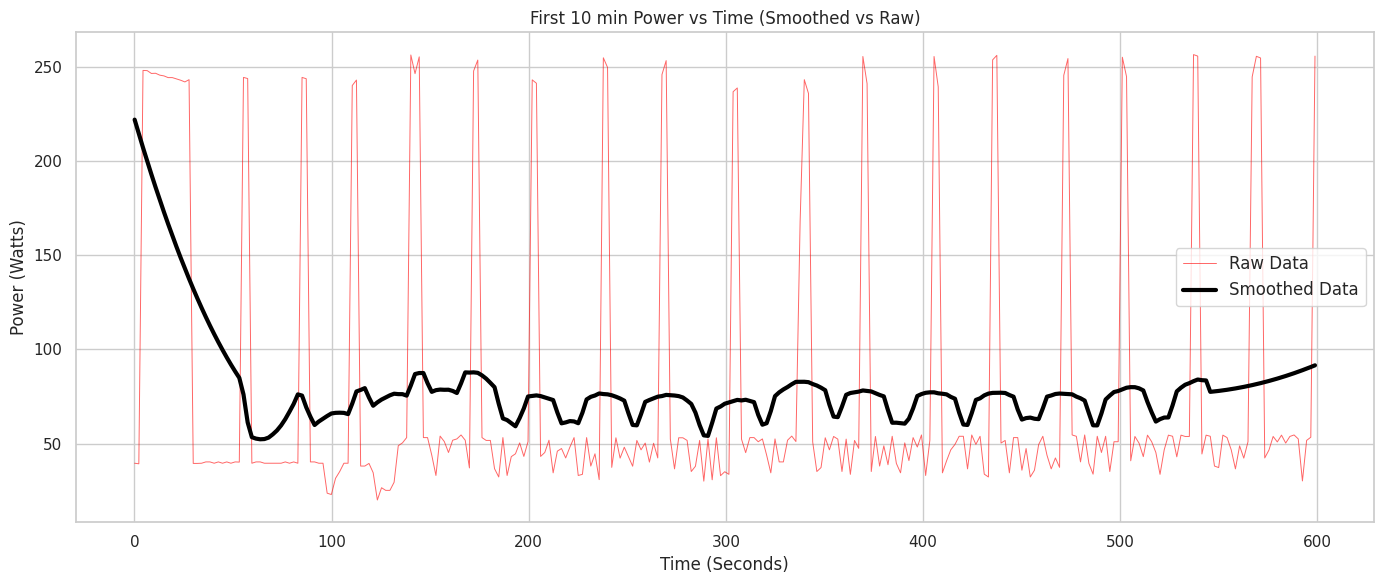

In [68]:
data_subset = df[df['Cumulative_time_s'] <= 600].copy()
data_subset['power_smooth'] = savgol_filter(data_subset['Power (W)'], 51, 2)

# plotting code uses df_subset instead of df
plt.figure(figsize=(14,6))
sns.set(style="whitegrid")

# Raw Data (thin line, transparent)
sns.lineplot(x='Cumulative_time_s', y='Power (W)', data=data_subset, linewidth=0.7, color='red', alpha=0.6, label='Raw Data')

# Smoothed Data (thick bold line)
sns.lineplot(x='Cumulative_time_s', y='power_smooth', data=data_subset, linewidth=3, color='black', label='Smoothed Data')

# Labels and formatting
plt.xlabel("Time (Seconds)")
plt.ylabel("Power (Watts)")
plt.title("First 10 min Power vs Time (Smoothed vs Raw)")

# Improve readability
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [69]:
print(f'time : {df['Cumulative_time_s'].max()//60}')
print(f'mean power : {df['Power (W)'].mean()}')
print(f'Total Energy : {df['Cumulative_Energy_Wh'].max()*3.6}')

time : 224.0
mean power : 79.61177770760972
Total Energy : 1070.6956499000028


# **Compersion Energy Consumption with Layer hieght**

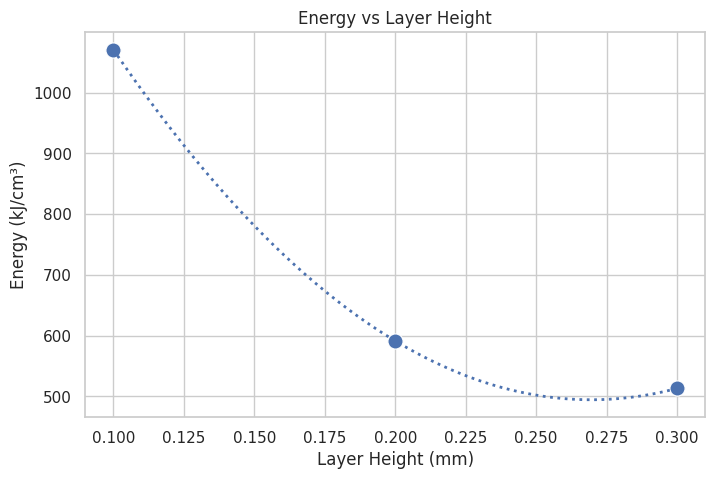

In [71]:
df = pd.DataFrame({
    'Layer_mm': [0.1, 0.2, 0.3],
    'Energy': [1070.695, 591.461, 513.279]
})
from scipy.interpolate import make_interp_spline

x_smooth = np.linspace(df.Layer_mm.min(), df.Layer_mm.max(), 200)
y_smooth = make_interp_spline(df.Layer_mm, df.Energy, k=2)(x_smooth)

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))

sns.scatterplot(data=df, x='Layer_mm', y='Energy', s=120)
sns.lineplot(x=x_smooth, y=y_smooth, linestyle="dotted", linewidth=2)

plt.xlabel("Layer Height (mm)")
plt.ylabel("Energy (kJ/cm³)")
plt.title("Energy vs Layer Height")
plt.show()

# **Experiment - 2**
### **Energy Usage Comparison with baseline**
### **Energy Usage with Indulation system**

In [72]:
df = pd.read_csv('/content/Insulation_result.csv')
df.head()

,Timestamp,Voltage (V),Current (A),Power (W),Delta Time (s),Cumulative Energy (Wh)
0,2025-12-01 15:13:39,23.92,10.53,251.8,0.101,0.007080
1,2025-12-01 15:13:41,23.93,10.50,251.2,2.124,0.155284
2,2025-12-01 15:13:43,23.93,10.50,251.2,2.133,0.304093
3,2025-12-01 15:13:45,23.93,10.47,250.5,2.121,0.451646
4,2025-12-01 15:13:47,24.01,1.65,39.6,2.125,0.475018


In [73]:
df.describe()

,Voltage (V),Current (A),Power (W),Delta Time (s),Cumulative Energy (Wh)
count,2774.000000,2774.000000,2774.000000,2774.000000,2774.000000
mean,23.978533,2.684394,64.259229,2.126243,54.241389
std,0.197676,2.628104,62.805688,0.196861,29.989073
min,13.660000,0.240000,5.700000,0.101000,0.007080
25%,23.980000,1.500000,36.000000,2.119000,28.829156
50%,23.990000,2.040000,48.900000,2.121000,55.232314
75%,24.000000,2.220000,53.200000,2.128000,80.320288
max,24.020000,11.100000,265.700000,12.287000,105.009143


In [74]:
df = df.drop(columns=['Timestamp', 'Cumulative Energy (Wh)'])

In [75]:
df = df[df['Power (W)'] > 20]
df = df[df['Delta Time (s)'] < 5]

In [76]:
df['Energy_step_Wh'] = df['Power (W)'] * df['Delta Time (s)'] / 3600
df['Cumulative_Energy_Wh'] = df['Energy_step_Wh'].cumsum()
df['Cumulative_time_s'] = df['Delta Time (s)'].cumsum()
df.head()

,Voltage (V),Current (A),Power (W),Delta Time (s),Energy_step_Wh,Cumulative_Energy_Wh,Cumulative_time_s
0,23.92,10.53,251.8,0.101,0.007064,0.007064,0.101
1,23.93,10.50,251.2,2.124,0.148208,0.155272,2.225
2,23.93,10.50,251.2,2.133,0.148836,0.304108,4.358
3,23.93,10.47,250.5,2.121,0.147586,0.451695,6.479
4,24.01,1.65,39.6,2.125,0.023375,0.475070,8.604


In [77]:
#save modified dataframe as csv file
df.to_csv('Modified_Insulation_result.csv', index=False)

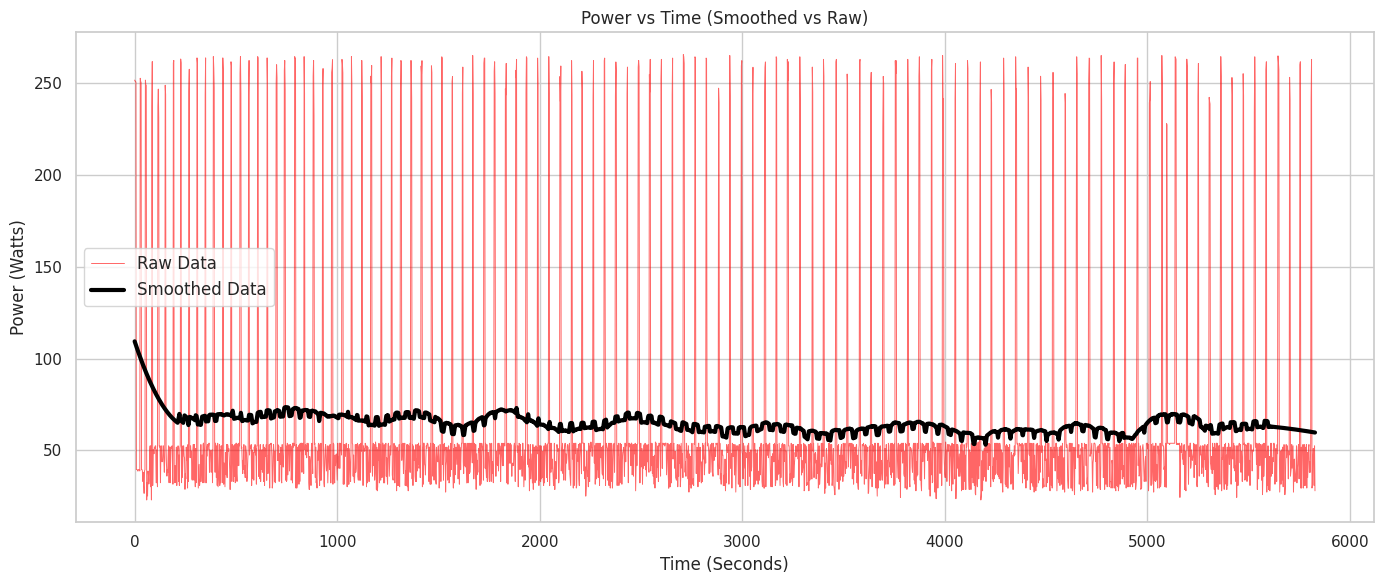

In [78]:
from scipy.signal import savgol_filter

# ---- SETTINGS ----
window_length = 201   # must be odd and <= dataset size
poly_order = 2        # polynomial fitting order

# Apply Savitzky–Golay smoothing
df['power_smooth'] = savgol_filter(df['Power (W)'], window_length, poly_order)

# ---- PLOT ----
plt.figure(figsize=(14,6))
sns.set(style="whitegrid")

# Raw Data (thin line, transparent)
sns.lineplot(x='Cumulative_time_s', y='Power (W)', data=df, linewidth=0.7, color='red', alpha=0.6, label='Raw Data')

# Smoothed Data (thick bold line)
sns.lineplot(x='Cumulative_time_s', y='power_smooth', data=df, linewidth=3, color='black', label='Smoothed Data')

# Labels and formatting
plt.xlabel("Time (Seconds)")
plt.ylabel("Power (Watts)")
plt.title("Power vs Time (Smoothed vs Raw)")

# Improve readability
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


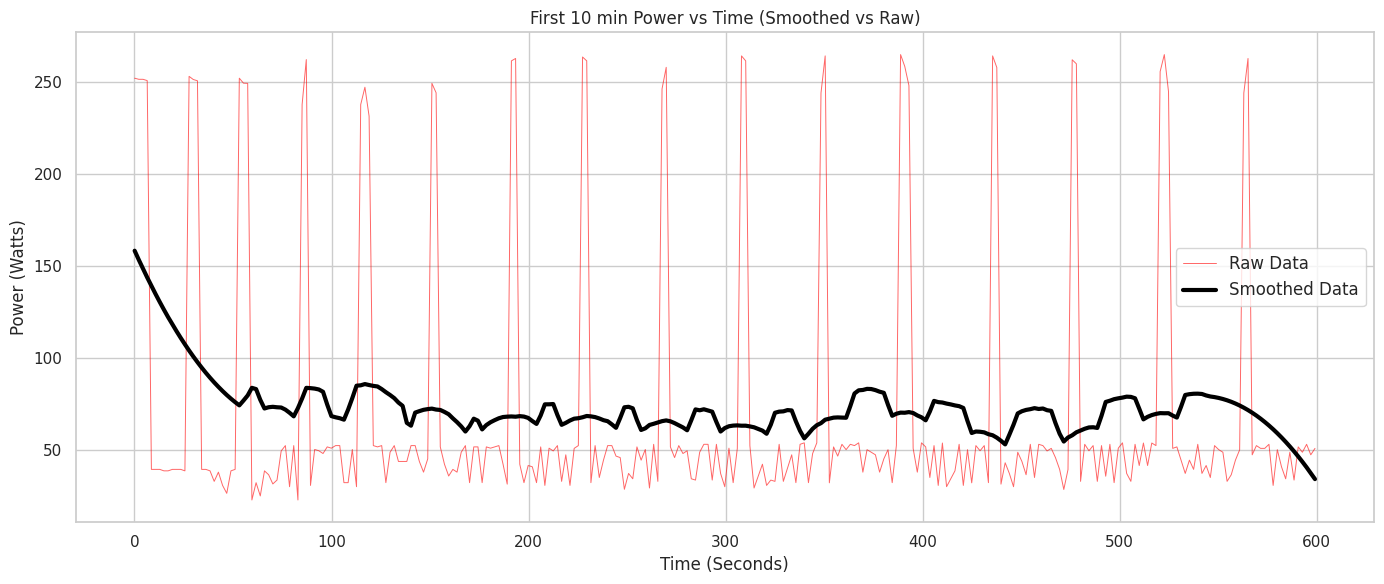

In [79]:
data_subset = df[df['Cumulative_time_s'] <= 600].copy()
data_subset['power_smooth'] = savgol_filter(data_subset['Power (W)'], 51, 2)

# plotting code uses df_subset instead of df
plt.figure(figsize=(14,6))
sns.set(style="whitegrid")

# Raw Data (thin line, transparent)
sns.lineplot(x='Cumulative_time_s', y='Power (W)', data=data_subset, linewidth=0.7, color='red', alpha=0.6, label='Raw Data')

# Smoothed Data (thick bold line)
sns.lineplot(x='Cumulative_time_s', y='power_smooth', data=data_subset, linewidth=3, color='black', label='Smoothed Data')

# Labels and formatting
plt.xlabel("Time (Seconds)")
plt.ylabel("Power (Watts)")
plt.title("First 10 min Power vs Time (Smoothed vs Raw)")

# Improve readability
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [80]:
print(f'time : {df['Cumulative_time_s'].max()//60}')
print(f'mean power : {df['Power (W)'].mean()}')
print(f'Total Energy : {df['Cumulative_Energy_Wh'].max()*3.6}')

time : 97.0
mean power : 64.75728332119446
Total Energy : 377.0528673000022


### **Energy Usage without heating the Bed**

In [81]:
df = pd.read_csv('/content/WIthout_heat_bed.csv')
df.head()

,Timestamp,Voltage (V),Current (A),Power (W),Delta Time (s),Cumulative Energy (Wh)
0,2025-11-30 21:50:55,23.99,2.10,50.3,0.104,0.001455
1,2025-11-30 21:50:57,24.00,1.41,33.8,2.123,0.021390
2,2025-11-30 21:50:59,24.01,2.13,51.1,2.120,0.051476
3,2025-11-30 21:51:01,24.01,1.50,36.0,2.128,0.072754
4,2025-11-30 21:51:03,24.00,2.22,53.2,2.119,0.104063


In [82]:
df.describe()

,Voltage (V),Current (A),Power (W),Delta Time (s),Cumulative Energy (Wh)
count,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000
mean,24.001946,1.743823,41.825669,2.127308,36.728647
std,0.350686,0.649546,15.599296,0.199208,24.730603
min,5.760000,0.000000,0.000000,0.104000,0.000064
25%,24.000000,1.590000,38.100000,2.119000,12.784786
50%,24.010000,1.980000,47.500000,2.121000,35.545878
75%,24.020000,2.220000,53.200000,2.128000,58.485533
max,24.060000,2.280000,54.700000,9.738000,78.606443


In [83]:
df = df.drop(columns=['Timestamp', 'Cumulative Energy (Wh)'])

In [84]:
df = df[df['Power (W)'] > 20]
df = df[df['Delta Time (s)'] < 5]

In [85]:
df['Energy_step_Wh'] = df['Power (W)'] * df['Delta Time (s)'] / 3600
df['Cumulative_Energy_Wh'] = df['Energy_step_Wh'].cumsum()
df['Cumulative_time_s'] = df['Delta Time (s)'].cumsum()
df.head()

,Voltage (V),Current (A),Power (W),Delta Time (s),Energy_step_Wh,Cumulative_Energy_Wh,Cumulative_time_s
0,23.99,2.10,50.3,0.104,0.001453,0.001453,0.104
1,24.00,1.41,33.8,2.123,0.019933,0.021386,2.227
2,24.01,2.13,51.1,2.120,0.030092,0.051478,4.347
3,24.01,1.50,36.0,2.128,0.021280,0.072758,6.475
4,24.00,2.22,53.2,2.119,0.031314,0.104072,8.594


In [86]:
#save modified dataframe as csv file
df.to_csv('Modified_WIthout_heat_bed.csv', index=False)

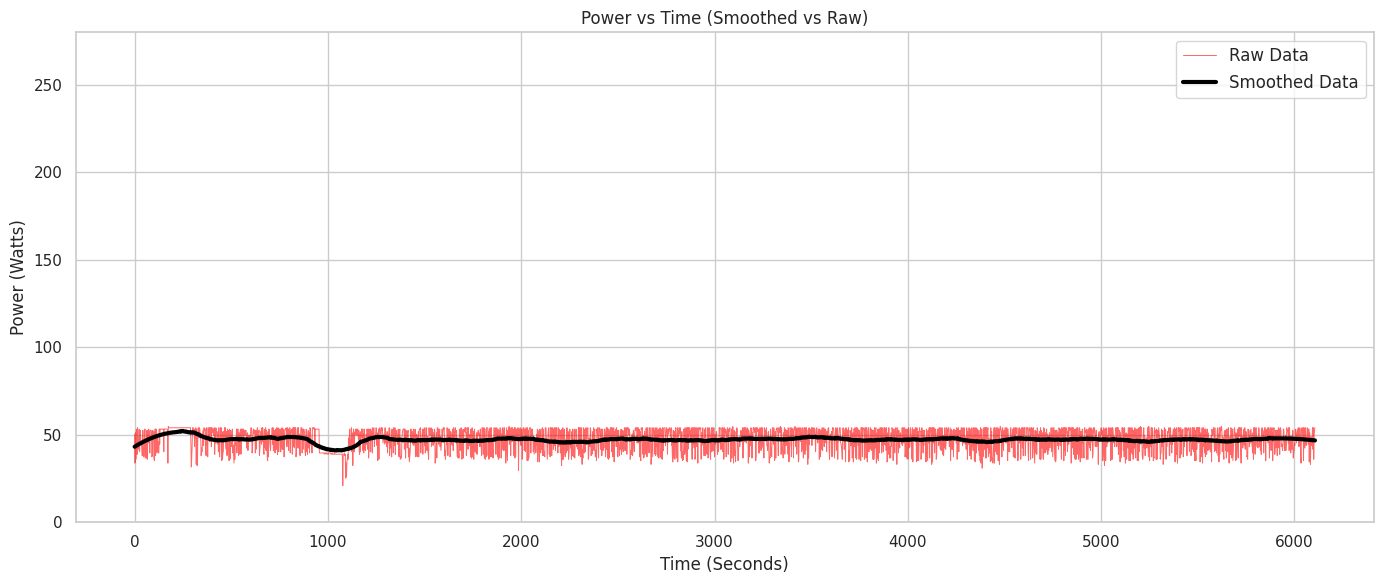

In [88]:
from scipy.signal import savgol_filter

# ---- SETTINGS ----
window_length = 201   # must be odd and <= dataset size
poly_order = 2        # polynomial fitting order

# Apply Savitzky–Golay smoothing
df['power_smooth'] = savgol_filter(df['Power (W)'], window_length, poly_order)

# ---- PLOT ----
plt.figure(figsize=(14,6))
sns.set(style="whitegrid")

# Raw Data (thin line, transparent)
sns.lineplot(x='Cumulative_time_s', y='Power (W)', data=df, linewidth=0.7, color='red', alpha=0.6, label='Raw Data')

# Smoothed Data (thick bold line)
sns.lineplot(x='Cumulative_time_s', y='power_smooth', data=df, linewidth=3, color='black', label='Smoothed Data')

# Labels and formatting
plt.xlabel("Time (Seconds)")
plt.ylabel("Power (Watts)")
plt.title("Power vs Time (Smoothed vs Raw)")
plt.ylim(0, 280)

# Improve readability
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


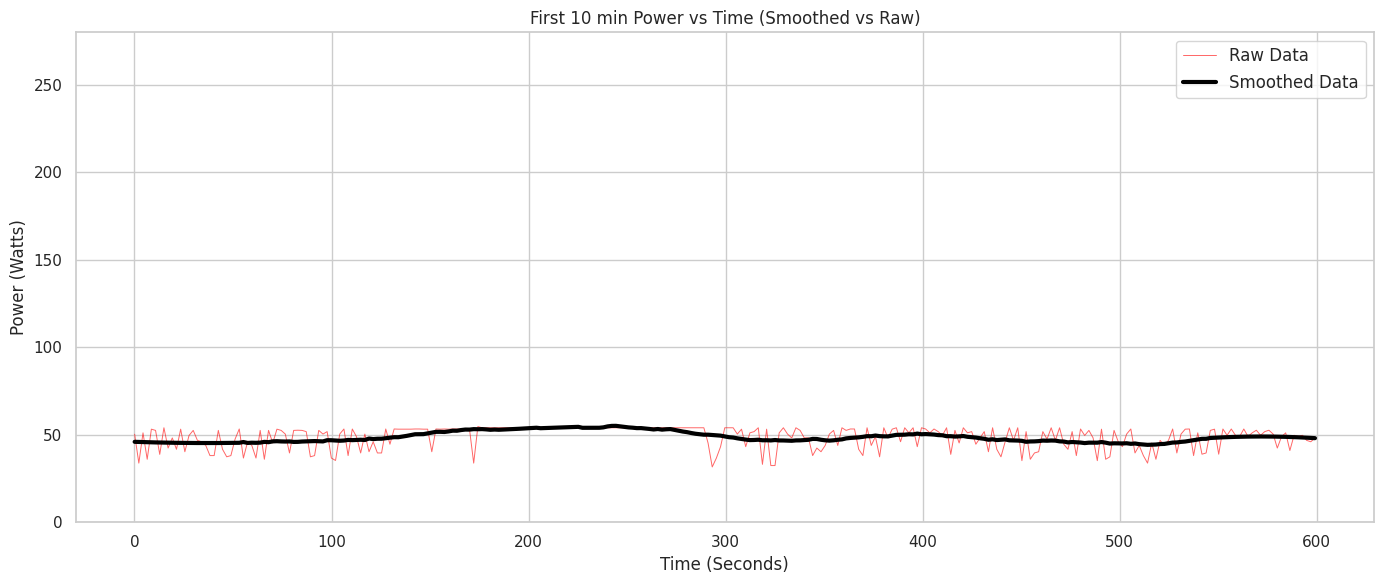

In [90]:
data_subset = df[df['Cumulative_time_s'] <= 600].copy()
data_subset['power_smooth'] = savgol_filter(data_subset['Power (W)'], 51, 2)

# plotting code uses df_subset instead of df
plt.figure(figsize=(14,6))
sns.set(style="whitegrid")

# Raw Data (thin line, transparent)
sns.lineplot(x='Cumulative_time_s', y='Power (W)', data=data_subset, linewidth=0.7, color='red', alpha=0.6, label='Raw Data')

# Smoothed Data (thick bold line)
sns.lineplot(x='Cumulative_time_s', y='power_smooth', data=data_subset, linewidth=3, color='black', label='Smoothed Data')

# Labels and formatting
plt.xlabel("Time (Seconds)")
plt.ylabel("Power (Watts)")
plt.title("First 10 min Power vs Time (Smoothed vs Raw)")
plt.ylim(0, 280)

# Improve readability
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [91]:
print(f'time : {df['Cumulative_time_s'].max()//60}')
print(f'mean power : {df['Power (W)'].mean()}')
print(f'Total Energy : {df['Cumulative_Energy_Wh'].max()*3.6}')

time : 101.0
mean power : 47.18651372957942
Total Energy : 288.12043489999957


### **Energy Usage without heating the Bed and Without heat end (Gohst Mode)**

In [117]:
df = pd.read_csv('/content/without_heatbed_heat_end.csv')
df.head()

,Timestamp,Voltage (V),Current (A),Power (W),Delta Time (s),Cumulative Energy (Wh)
0,2025-12-01 11:44:19,24.05,0.06,1.4,0.094,0.000037
1,2025-12-01 11:44:21,24.04,0.06,1.4,2.130,0.000865
2,2025-12-01 11:44:23,24.04,0.06,1.4,2.119,0.001689
3,2025-12-01 11:44:25,24.04,0.06,1.4,2.122,0.002514
4,2025-12-01 11:44:27,24.04,0.06,1.4,2.130,0.003342


In [118]:
df.describe()

,Voltage (V),Current (A),Power (W),Delta Time (s),Cumulative Energy (Wh)
count,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000
mean,24.011952,0.679329,16.246627,2.122783,11.902135
std,0.098897,0.065268,1.564879,0.040938,7.025374
min,19.190000,0.060000,1.400000,0.094000,0.000037
25%,24.000000,0.690000,16.500000,2.119000,5.802234
50%,24.020000,0.690000,16.500000,2.122000,11.895081
75%,24.030000,0.690000,16.500000,2.128000,17.983467
max,24.050000,0.720000,17.300000,2.158000,24.006205


In [119]:
df = df.drop(columns=['Timestamp', 'Cumulative Energy (Wh)'])

In [120]:
df = df[df['Power (W)'] > 5]
df = df[df['Delta Time (s)'] < 5]

In [121]:
df['Energy_step_Wh'] = df['Power (W)'] * df['Delta Time (s)'] / 3600
df['Cumulative_Energy_Wh'] = df['Energy_step_Wh'].cumsum()
df['Cumulative_time_s'] = df['Delta Time (s)'].cumsum()
df.head()

,Voltage (V),Current (A),Power (W),Delta Time (s),Energy_step_Wh,Cumulative_Energy_Wh,Cumulative_time_s
18,24.03,0.63,15.1,2.118,0.008884,0.008884,2.118
19,24.03,0.63,15.1,2.117,0.008880,0.017763,4.235
20,24.03,0.63,15.1,2.134,0.008951,0.026714,6.369
21,24.03,0.63,15.1,2.120,0.008892,0.035607,8.489
22,24.03,0.63,15.1,2.118,0.008884,0.044490,10.607


In [122]:
#save modified dataframe as csv file
df.to_csv('Modified_without_heatbed_heat_end.csv', index=False)

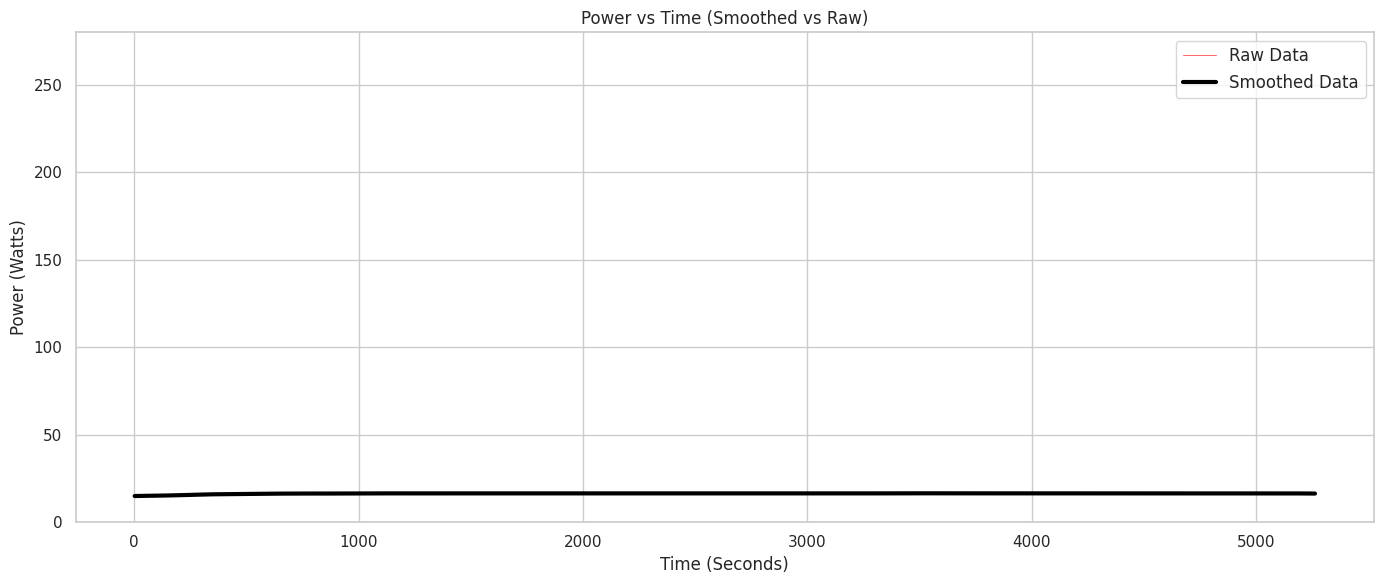

In [123]:
from scipy.signal import savgol_filter

# ---- SETTINGS ----
window_length = 201   # must be odd and <= dataset size
poly_order = 2        # polynomial fitting order

# Apply Savitzky–Golay smoothing
df['power_smooth'] = savgol_filter(df['Power (W)'], window_length, poly_order)

# ---- PLOT ----
plt.figure(figsize=(14,6))
sns.set(style="whitegrid")

# Raw Data (thin line, transparent)
sns.lineplot(x='Cumulative_time_s', y='Power (W)', data=df, linewidth=0.7, color='red', alpha=0.6, label='Raw Data')

# Smoothed Data (thick bold line)
sns.lineplot(x='Cumulative_time_s', y='power_smooth', data=df, linewidth=3, color='black', label='Smoothed Data')

# Labels and formatting
plt.xlabel("Time (Seconds)")
plt.ylabel("Power (Watts)")
plt.title("Power vs Time (Smoothed vs Raw)")
plt.ylim(0, 280)

# Improve readability
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


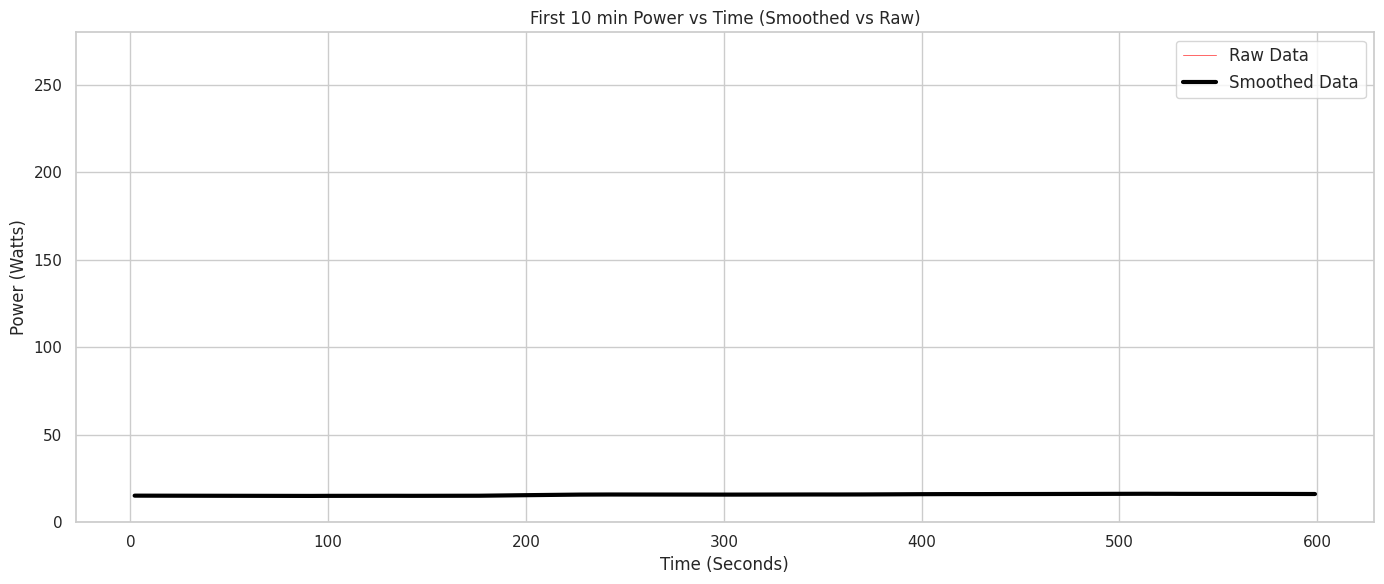

In [124]:
data_subset = df[df['Cumulative_time_s'] <= 600].copy()
data_subset['power_smooth'] = savgol_filter(data_subset['Power (W)'], 51, 2)

# plotting code uses df_subset instead of df
plt.figure(figsize=(14,6))
sns.set(style="whitegrid")

# Raw Data (thin line, transparent)
sns.lineplot(x='Cumulative_time_s', y='Power (W)', data=data_subset, linewidth=0.7, color='red', alpha=0.6, label='Raw Data')

# Smoothed Data (thick bold line)
sns.lineplot(x='Cumulative_time_s', y='power_smooth', data=data_subset, linewidth=3, color='black', label='Smoothed Data')

# Labels and formatting
plt.xlabel("Time (Seconds)")
plt.ylabel("Power (Watts)")
plt.title("First 10 min Power vs Time (Smoothed vs Raw)")
plt.ylim(0, 280)

# Improve readability
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [125]:
print(f'time : {df['Cumulative_time_s'].max()//60}')
print(f'mean power : {df['Power (W)'].mean()}')
print(f'Total Energy : {df['Cumulative_Energy_Wh'].max()*3.6}')

time : 87.0
mean power : 16.406295399515738
Total Energy : 86.33354779999961


In [126]:
energy_compresion = pd.DataFrame({
    "print_mode" : [" Baseline", "Insulated", "No heated bed", "Ghost"],
    "energy_consumption" : [513.279, 377.052, 288.120, 86.333]
})
energy_compresion

,print_mode,energy_consumption
0,Baseline,513.279
1,Insulated,377.052
2,No heated bed,288.120
3,Ghost,86.333


/tmp/ipython-input-4132207895.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='print_mode', y = 'energy_consumption', data = energy_compresion, palette="viridis")


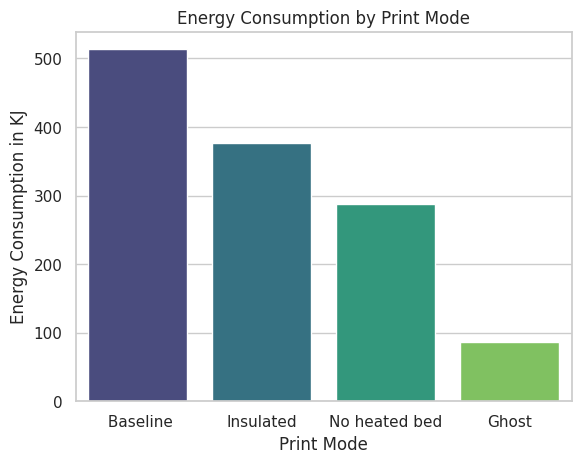

In [127]:
sns.barplot(x='print_mode', y = 'energy_consumption', data = energy_compresion, palette="viridis")
plt.xlabel("Print Mode")
plt.ylabel("Energy Consumption in KJ")
plt.title("Energy Consumption by Print Mode")
plt.show()

In [128]:
from scipy.signal import savgol_filter
import pandas as pd

# Define smoothing parameters
window_length = 201
poly_order = 2

# 1. Load 'baseline_l3_modified.csv' and apply filter
df_baseline_l3 = pd.read_csv('/content/baseline_l3_modified.csv')
df_baseline_l3['power_smooth'] = savgol_filter(df_baseline_l3['Power (W)'], window_length, poly_order)
print('df_baseline_l3 loaded and smoothed.')

# 2. Load 'Modified_Insulation_result.csv' and apply filter
df_insulated = pd.read_csv('/content/Modified_Insulation_result.csv')
df_insulated['power_smooth'] = savgol_filter(df_insulated['Power (W)'], window_length, poly_order)
print('df_insulated loaded and smoothed.')

# 3. Load 'Modified_WIthout_heat_bed.csv' and apply filter
df_no_heated_bed = pd.read_csv('/content/Modified_WIthout_heat_bed.csv')
df_no_heated_bed['power_smooth'] = savgol_filter(df_no_heated_bed['Power (W)'], window_length, poly_order)
print('df_no_heated_bed loaded and smoothed.')

# 4. Load 'Modified_without_heatbed_heat_end.csv' and apply filter
df_ghost_mode = pd.read_csv('/content/Modified_without_heatbed_heat_end.csv')
df_ghost_mode['power_smooth'] = savgol_filter(df_ghost_mode['Power (W)'], window_length, poly_order)
print('df_ghost_mode loaded and smoothed.')

df_baseline_l3 loaded and smoothed.
df_insulated loaded and smoothed.
df_no_heated_bed loaded and smoothed.
df_ghost_mode loaded and smoothed.


## Generate Subplots

### Subtask:
Create a figure with subplots (2x2 grid) to display the power vs. time graphs for all four datasets. Each subplot should show both the raw 'Power (W)' and the 'power_smooth' data against 'Cumulative_time_s'. Ensure appropriate titles, labels, and legends for each subplot, and use plt.tight_layout() for better presentation.


**Reasoning**:
The subtask requires generating a 2x2 grid of subplots, each visualizing raw and smoothed power consumption data for different experimental conditions. This code block will create the figure, plot the data for each condition in its respective subplot with appropriate labels and legends, and ensure a clean layout.



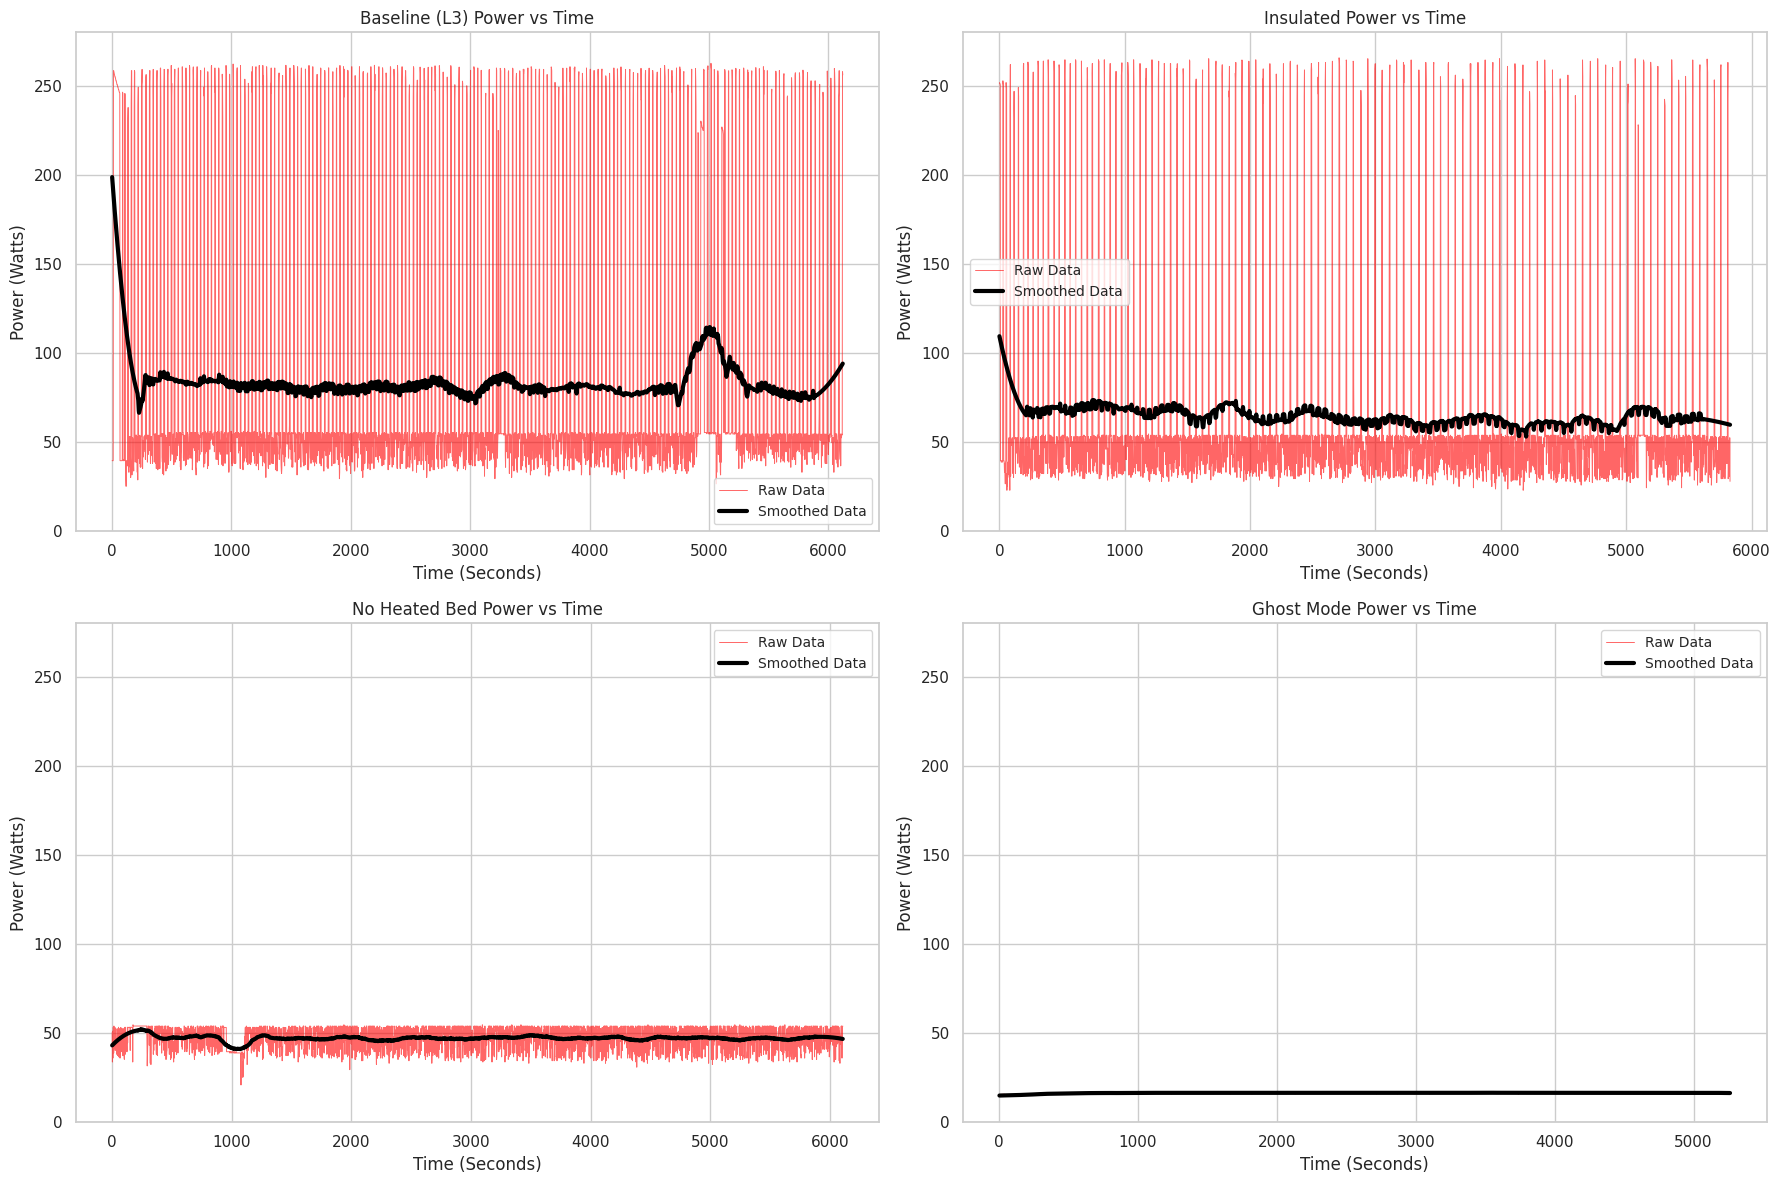

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(18, 12)) # Create a 2x2 grid of subplots
# y axis the y limit needs to be 280
axes[0, 0].set_ylim(0, 280)
axes[0, 1].set_ylim(0, 280)
axes[1, 0].set_ylim(0, 280)
axes[1, 1].set_ylim(0, 280)

# Subplot 1: Baseline (L3)
sns.lineplot(x='Cumulative_time_s', y='Power (W)', data=df_baseline_l3, linewidth=0.7, color='red', alpha=0.6, label='Raw Data', ax=axes[0, 0])
sns.lineplot(x='Cumulative_time_s', y='power_smooth', data=df_baseline_l3, linewidth=3, color='black', label='Smoothed Data', ax=axes[0, 0])
axes[0, 0].set_title('Baseline (L3) Power vs Time')
axes[0, 0].set_xlabel('Time (Seconds)')
axes[0, 0].set_ylabel('Power (Watts)')
axes[0, 0].legend(fontsize=10)

# Subplot 2: Insulated
sns.lineplot(x='Cumulative_time_s', y='Power (W)', data=df_insulated, linewidth=0.7, color='red', alpha=0.6, label='Raw Data', ax=axes[0, 1])
sns.lineplot(x='Cumulative_time_s', y='power_smooth', data=df_insulated, linewidth=3, color='black', label='Smoothed Data', ax=axes[0, 1])
axes[0, 1].set_title('Insulated Power vs Time')
axes[0, 1].set_xlabel('Time (Seconds)')
axes[0, 1].set_ylabel('Power (Watts)')
axes[0, 1].legend(fontsize=10)

# Subplot 3: No Heated Bed
sns.lineplot(x='Cumulative_time_s', y='Power (W)', data=df_no_heated_bed, linewidth=0.7, color='red', alpha=0.6, label='Raw Data', ax=axes[1, 0])
sns.lineplot(x='Cumulative_time_s', y='power_smooth', data=df_no_heated_bed, linewidth=3, color='black', label='Smoothed Data', ax=axes[1, 0])
axes[1, 0].set_title('No Heated Bed Power vs Time')
axes[1, 0].set_xlabel('Time (Seconds)')
axes[1, 0].set_ylabel('Power (Watts)')
axes[1, 0].legend(fontsize=10)

# Subplot 4: Ghost Mode
sns.lineplot(x='Cumulative_time_s', y='Power (W)', data=df_ghost_mode, linewidth=0.7, color='red', alpha=0.6, label='Raw Data', ax=axes[1, 1])
sns.lineplot(x='Cumulative_time_s', y='power_smooth', data=df_ghost_mode, linewidth=3, color='black', label='Smoothed Data', ax=axes[1, 1])
axes[1, 1].set_title('Ghost Mode Power vs Time')
axes[1, 1].set_xlabel('Time (Seconds)')
axes[1, 1].set_ylabel('Power (Watts)')
axes[1, 1].legend(fontsize=10)

plt.tight_layout()
plt.show()